In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
olympics = pd.read_csv('olympics/athlete_events.csv', index_col=0)

# Choropleth

In [3]:
sport_games_cts = olympics.groupby('Sport').nunique().Games

In [4]:
sport_games_cts = sport_games_cts[sport_games_cts>=2]

In [5]:
sport_index = olympics.set_index('Sport')

In [6]:
olympics_refined = sport_index.loc[sport_games_cts.index]

In [7]:
golds = olympics_refined[olympics_refined.Medal=='Gold']

In [8]:
sport_golds = golds.groupby(['Sport', 'NOC']).count().Medal

In [9]:
sports = []
top_countries = []
for sport in sport_golds.index.levels[0]:
    sport_gold_count = sport_golds.loc[sport]
    sports.append(sport)
    top_countries.append(sport_gold_count.idxmax())

In [10]:
top_countries = ['RUS' if country == 'URS' else country for country in top_countries]

In [11]:
country_sports = pd.Series(sports, index=top_countries)

In [12]:
countries = []
sport_strings = []
sport_cts = []
for country in country_sports.index.unique():
    country_sport = country_sports.loc[country]
    if type(country_sport) == str:
        sport_strings.append(country_sport)
        sport_cts.append(1)
    else:
        all_sports = ', '.join(country_sport.values)
        sport_strings.append(all_sports)
        sport_cts.append(country_sport.shape[0])
    countries.append(country)

In [13]:
final_info = pd.DataFrame([sport_cts, sport_strings], columns=countries, index=['count', 'string']).transpose()

In [14]:
final_info

,count,string
AUT,1,Alpine Skiing
GBR,4,"Alpinism, Polo, Triathlon, Tug-Of-War"
KOR,3,"Archery, Short Track Speed Skating, Taekwondo"
GER,6,"Art Competitions, Biathlon, Bobsleigh, Canoein..."
USA,14,"Athletics, Basketball, Beach Volleyball, Boxin..."
CHN,4,"Badminton, Diving, Table Tennis, Trampolining"
CUB,1,Baseball
NOR,3,"Cross Country Skiing, Nordic Combined, Sailing"
CAN,4,"Curling, Freestyle Skiing, Ice Hockey, Lacrosse"
ITA,2,"Cycling, Fencing"


In [15]:
final_info.to_csv('country_cts.csv')

# Boxplot

In [16]:
only_summer_golds = olympics[(olympics.Medal == 'Gold') & (olympics.Season == 'Summer')]

In [17]:
class smart_dict(dict):
    def __missing__(self, key):
        return key

In [18]:
only_summer_golds['NOC'] = only_summer_golds.NOC.map(smart_dict({'URS':'RUS', 'GDR':'GER'})).copy()

/Users/eddieowens/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
country_gold_cts = only_summer_golds.groupby(['NOC', 'Games']).nunique().Event

In [20]:
top15 = country_gold_cts.groupby(['NOC']).sum().sort_values(ascending=False).iloc[:15]

In [21]:
top15_golds = country_gold_cts.loc[top15.index].reset_index()

In [22]:
top15_golds.NOC.unique()

array(['AUS', 'CHN', 'FIN', 'FRA', 'GBR', 'GER', 'HUN', 'ITA', 'JPN',
       'KOR', 'NED', 'ROU', 'RUS', 'SWE', 'USA'], dtype=object)

In [23]:
nation_colors = ['#00843D',  # AUS
                 '#aa381e',  # CHN
                 '#b5c9d8',  # FIN
                 '#0072bb',  # FRA
                 '#001F7E',  # GBR
                 '#FFCE00',  # GER
                 '#436F4D',  # HUN
                 '#009246',  # ITA
                 '#bc002d',  # JPN
                 '#0047A0',  # KOR
                 '#FFA500',  # NED
                 '#FCD116',  # ROU
                 '#D52B1E',  # RUS
                 '#fecc00',  # SWE
                 '#3C3B6E',  # USA
                ]

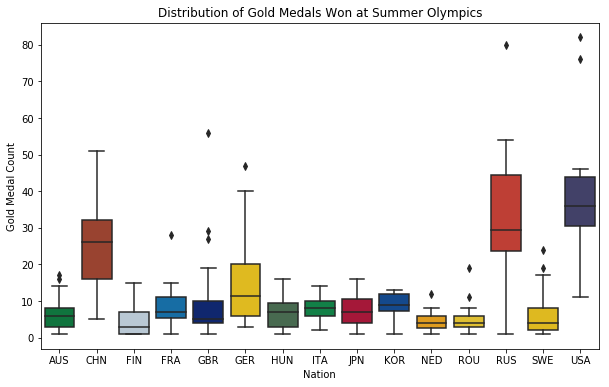

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(data=top15_golds, x='NOC', y='Event', palette=nation_colors)
plt.title('Distribution of Gold Medals Won at Summer Olympics')
plt.xlabel('Nation')
plt.ylabel('Gold Medal Count')
plt.show()

# Histogram

In [25]:
import numpy as np

In [26]:
athletics = olympics[(olympics.Sport == 'Athletics') & (olympics.Year >= 2000)]

In [27]:
athletics_medals = athletics[1-athletics.Medal.isna() == 1]

In [28]:
country_athletics_medals = athletics_medals.groupby(['NOC', 'Year']).Event.nunique()

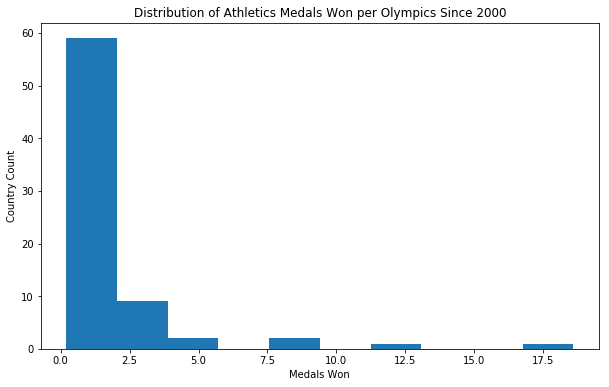

In [29]:
plt.figure(figsize=(10,6))
plt.hist(country_athletics_medals.groupby(['NOC']).sum()/5)
plt.title('Distribution of Athletics Medals Won per Olympics Since 2000')
plt.xlabel('Medals Won')
plt.ylabel('Country Count')
plt.show()

In [30]:
(country_athletics_medals.groupby(['NOC']).sum()/5).sort_values(ascending=False)

NOC
USA    18.6
RUS    11.4
KEN     8.0
JAM     7.6
GBR     5.6
ETH     5.4
CUB     3.6
GER     3.2
AUS     3.0
CHN     2.8
POL     2.6
FRA     2.6
UKR     2.6
RSA     2.2
GRE     2.2
BLR     2.0
MAR     2.0
BAH     2.0
CZE     1.8
TTO     1.8
CAN     1.8
ITA     1.6
ROU     1.6
NZL     1.4
JPN     1.4
ALG     1.4
NGR     1.2
ESP     1.2
NOR     1.0
BRA     1.0
       ... 
HUN     0.6
BRN     0.6
GRN     0.4
COL     0.4
CMR     0.4
BUL     0.4
QAT     0.4
BOT     0.2
BDI     0.2
BAR     0.2
AUT     0.2
VEN     0.2
ECU     0.2
ERI     0.2
UGA     0.2
TUN     0.2
TJK     0.2
SVK     0.2
SUD     0.2
SRI     0.2
SRB     0.2
PUR     0.2
PAN     0.2
NED     0.2
MOZ     0.2
KSA     0.2
IRL     0.2
IRI     0.2
GUA     0.2
ISL     0.2
Name: Event, Length: 74, dtype: float64

# Barplot

In [31]:
phelps = olympics[olympics.Name == 'Michael Fred Phelps, II']

In [32]:
phelps.fillna('None', inplace=True)

/Users/eddieowens/miniconda3/lib/python3.7/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [33]:
phelps_byyear = phelps.groupby(['Year', 'Medal']).Event.nunique()

In [34]:
medal_ct = []
years = []
medals = []
for year in phelps_byyear.index.levels[0]:
    for medal in phelps_byyear.index.levels[1]:
        if medal in phelps_byyear.loc[year]:
            medal_ct.append(phelps_byyear.loc[year].loc[medal])
        else:
            medal_ct.append(0)
        years.append(year)
        medals.append(medal)

In [35]:
full_phelps = pd.DataFrame({'Year':years, 'Medal_ct':medal_ct}, index=medals)

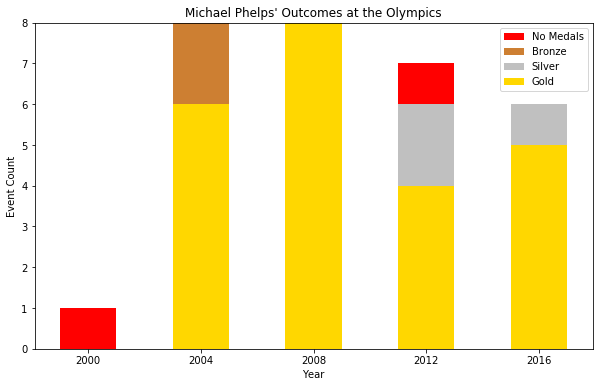

In [36]:
plt.figure(figsize=(10,6))
bar_Gold = plt.bar(full_phelps.loc['Gold'].Year, full_phelps.loc['Gold'].Medal_ct, color='gold', width=2)
bar_Silver = plt.bar(full_phelps.loc['Silver'].Year, full_phelps.loc['Silver'].Medal_ct, 
                     bottom=full_phelps.loc['Gold'].Medal_ct, color='Silver', width=2)
bar_Bronze = plt.bar(full_phelps.loc['Bronze'].Year, full_phelps.loc['Bronze'].Medal_ct, 
                     bottom=full_phelps.loc['Gold'].Medal_ct.values+full_phelps.loc['Silver'].Medal_ct.values,
                    color='#cd7f32', width=2)
bar_None = plt.bar(full_phelps.loc['None'].Year, full_phelps.loc['None'].Medal_ct, 
                   bottom=full_phelps.loc['Gold'].Medal_ct.values+full_phelps.loc['Silver'].Medal_ct.values+
                  full_phelps.loc['Bronze'].Medal_ct.values, color='Red', width=2)

plt.xticks([2000, 2004, 2008, 2012, 2016])
plt.legend((bar_None[0], bar_Bronze[0], bar_Silver[0], bar_Gold[0]), ('No Medals', 'Bronze', 'Silver', 'Gold'),
          bbox_to_anchor=(1,1))
plt.title("Michael Phelps' Outcomes at the Olympics")
plt.xlabel('Year')
plt.ylabel('Event Count')
plt.show()

# Heat Map

In [37]:
sport_sample = ['Athletics', 'Gymnastics', 'Swimming', 'Rowing', 'Wrestling', 'Weightlifting',
                'Cross Country Skiing', 'Alpine Skiing', 'Speed Skating', 'Figure Skating']

In [38]:
sport_binary = [True if sport in sport_sample else False for sport in olympics.Sport]

In [39]:
select_sports = olympics[sport_binary & (olympics.Medal=='Gold')]

In [40]:
select_sports['NOC'] = select_sports.NOC.map(smart_dict({'URS':'RUS', 'GDR':'GER'}))

/Users/eddieowens/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
country_full_cts = select_sports.groupby(['NOC', 'Games', 'Sport']).Event.nunique().reset_index()

In [42]:
top_countries = top15_golds.NOC.unique()

In [43]:
country_sport_cts = country_full_cts.groupby(['Sport','NOC']).Event.sum()

In [44]:
full_data = []
for sport in sport_sample:
    sport_data = country_sport_cts.loc[sport]
    tot = sum(sport_data)
    sport_list = []
    for country in top_countries:
        if country in sport_data.index:
            country_sport = sport_data.loc[country]
            sport_list.append(country_sport/tot)
        else:
            sport_list.append(0)
    full_data.append(sport_list)

In [45]:
matrix = pd.DataFrame(full_data, index=sport_sample, columns=top_countries)

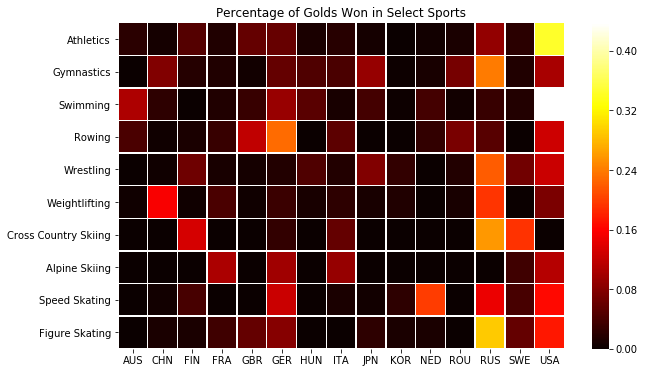

In [46]:
plt.figure(figsize=(10,6))
ax = sns.heatmap(matrix, linewidth=0.5, cmap='hot')
plt.title('Percentage of Golds Won in Select Sports')
# plt.xlabel('Country')
# plt.ylabel('Sport')
plt.show()

# Choropleth

In [47]:
south_american = ['ARG', 'BOL', 'BRA', 'CHI', 'COL', 'ECU', 'GUY', 'PAR',
                 'PER', 'SUR', 'URU', 'VEN']

In [48]:
south_american_data = olympics[[True if country in south_american else False for country in olympics.NOC]]

In [49]:
south_american_data.fillna('None', inplace=True)

In [50]:
south_american_data = south_american_data[south_american_data.Medal != 'None']

In [51]:
sa_medal_cts = south_american_data.groupby(['NOC', 'Games', 'Medal']).Event.nunique().reset_index()

In [52]:
sa_medal_cts.groupby(['NOC']).Event.sum().to_csv('south_america.csv')

/Users/eddieowens/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# Connection Map

In [53]:
host_cities = olympics.groupby('Games').City.unique()

In [54]:
host_cities_full = pd.DataFrame([value.split() for value in host_cities.index.values], columns=['Year', 'Games'])

In [55]:
host_cities_full['City'] = [array[0] for array in host_cities]

In [56]:
host_cities_full.sort_values(['Games', 'Year']).to_csv('connection.csv')

# Stream graph

In [57]:
regions = pd.read_csv('olympics/noc_regions.csv', index_col=0)

In [58]:
region_dict = {noc:regions.continent.loc[noc] for noc in regions.index}

In [59]:
olympics['continent'] = olympics.NOC.map(region_dict)

In [60]:
olympics[olympics.Season=='Summer'].groupby(['Year', 'continent']).Name.nunique().to_csv('stream.csv')

/Users/eddieowens/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# Treemap

In [61]:
all_years = olympics[(olympics.Season=='Winter') & (olympics.Medal=='Gold')].groupby(['Year', 'continent', 'NOC']).Event.nunique()

In [62]:
all_years = all_years.reset_index()

In [63]:
all_years['NOC'] = all_years.NOC.map(smart_dict({'GDR':'GER', 'URS':'RUS'}))

In [64]:
all_years.groupby(['continent', 'NOC']).Event.sum().to_csv('treemap.csv')

/Users/eddieowens/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


# Scatterplot

In [65]:
population = pd.read_excel('world_pop2.xlsx', index_col=0)

In [66]:
pop_2015 = population[2015]

In [67]:
country_golds = olympics[(olympics.Year>=2000) & (olympics.Medal=='Gold')].groupby(['NOC', 'Games']).Event.nunique()

In [68]:
country_golds_tot = country_golds.reset_index().groupby('NOC').sum()

In [69]:
country_codes = {noc:regions.region.loc[noc] for noc in regions.index}
region_dict = {noc:regions.continent.loc[noc] for noc in regions.index}
continent_map = {'africa':'Africa', 'asia':'Asia', 'northam':'North America',
                'europe':'Europe', 'southam':'South America', 'oceania':'Oceania'}

In [70]:
country_golds_tot['country'] = country_golds_tot.index.map(country_codes)
country_golds_tot['continent'] = country_golds_tot.index.map(region_dict)

In [71]:
country_golds_tot.set_index('country', inplace=True)

In [72]:
country_gold_popn = country_golds_tot.join(pop_2015, how='outer')

In [73]:
country_gold_popn = country_gold_popn[(country_gold_popn.Event>0)]

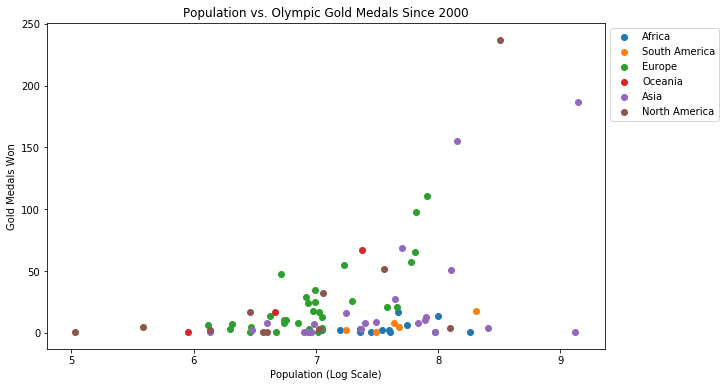

In [74]:
plt.figure(figsize=(10,6))
axes = []
continents = []
for continent in country_gold_popn.continent.unique():
    if continent not in ['none', np.nan]:
        continent_golds = country_gold_popn[country_gold_popn.continent==continent]
        axes.append(plt.scatter(np.log10(continent_golds[2015]*1000), continent_golds.Event))
        continents.append(continent_map[continent])
plt.title('Population vs. Olympic Gold Medals Since 2000')
plt.xlabel('Population (Log Scale)')
plt.ylabel('Gold Medals Won')
plt.legend(axes, continents, bbox_to_anchor=(1,1))
plt.show()

# Storyline

In [109]:
gdp = pd.read_excel('gdp.xlsx', index_col=4)

In [111]:
country_gold_gdp = country_golds_tot.join(gdp, how='outer')

In [112]:
country_gold_gdp = country_gold_gdp[(country_gold_gdp.Event>0)]

In [116]:
country_gold_gdp.unGDP.sort_values()

country
Taiwan                             0.000000
Grenada                            1.016208
Fiji                               4.671118
Tajikistan                         6.951679
Armenia                           10.572299
Mozambique                        10.930132
Mongolia                          11.160357
Bahamas                           11.261800
Jamaica                           14.056901
Georgia                           14.332729
Zimbabwe                          16.123764
North Korea                       16.788602
Estonia                           23.337921
Trinidad                          24.086177
Uganda                            25.307842
Latvia                            27.572698
Bahrain                           32.179074
Cameroon                          32.217074
Ivory Coast                       36.767790
Azerbaijan                        37.847204
Serbia                            38.299872
Serbia                            38.299872
Jordan                  

/Users/eddieowens/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


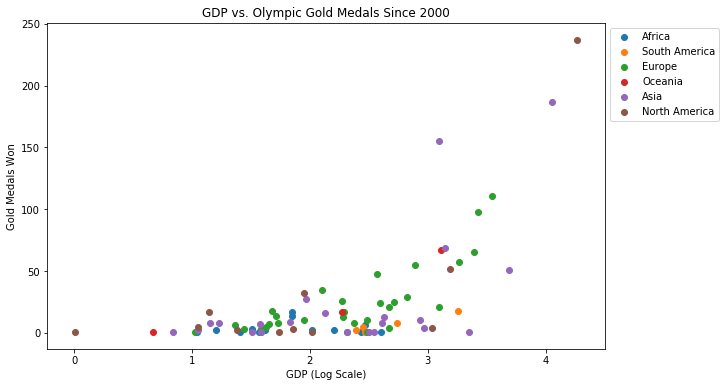

In [118]:
plt.figure(figsize=(10,6))
axes = []
continents = []
for continent in country_gold_gdp.continent.unique():
    if continent not in ['none', np.nan]:
        continent_golds = country_gold_gdp[country_gold_gdp.continent==continent]
        axes.append(plt.scatter(np.log10(continent_golds.unGDP), continent_golds.Event))
        continents.append(continent_map[continent])
plt.title('GDP vs. Olympic Gold Medals Since 2000')
plt.xlabel('GDP (Log Scale)')
plt.ylabel('Gold Medals Won')
plt.legend(axes, continents, bbox_to_anchor=(1,1))
plt.show()